In [40]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA

In [24]:
stock_df = pd.read_csv('stock_data.csv')

In [25]:
stock_df.head()

,beta,bookValuePerShare,currentRatio,divGrowthRate3Year,dividendAmount,dividendDate,dividendPayAmount,dividendPayDate,dividendYield,epsChange,...,revChangeYear,sharesOutstanding,shortIntDayToCover,shortIntToFloat,symbol,totalDebtToCapital,totalDebtToEquity,vol10DayAvg,vol1DayAvg,vol3MonthAvg
0,1.21802,2.79895,1.31538,0.0,3.080000,2019-05-10 00:00:00.0,0.770000,2019-08-16 00:00:00.0,1.57,0.0,...,0.0,4601.07500,0.0,0.0,AAPL,51.54927,106.3952,22963900.0,22963900.0,585636010.0
1,2.35784,0.00000,18.20330,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,63.78077,0.0,0.0,ADVM,0.00000,0.0000,625225.0,625220.0,13701860.0
2,0.85623,31.06079,3.46119,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,59.12744,0.0,0.0,AAXN,0.00000,0.0000,1287277.0,1287280.0,15188870.0
3,0.66686,0.00000,6.23734,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,50.06428,0.0,0.0,ACTG,0.00000,0.0000,104801.0,104800.0,2676700.0
4,0.94418,0.00000,0.00000,0.0,1.338665,2019-06-17 00:00:00.0,0.411154,2019-12-23 00:00:00.0,1.95,0.0,...,0.0,58.80000,0.0,0.0,AAXJ,0.00000,0.0000,736602.0,736600.0,29469660.0


In [26]:
list(stock_df.columns)

['beta',
 'bookValuePerShare',
 'currentRatio',
 'divGrowthRate3Year',
 'dividendAmount',
 'dividendDate',
 'dividendPayAmount',
 'dividendPayDate',
 'dividendYield',
 'epsChange',
 'epsChangePercentTTM',
 'epsChangeYear',
 'epsTTM',
 'grossMarginMRQ',
 'grossMarginTTM',
 'high52',
 'interestCoverage',
 'low52',
 'ltDebtToEquity',
 'marketCap',
 'marketCapFloat',
 'netProfitMarginMRQ',
 'netProfitMarginTTM',
 'operatingMarginMRQ',
 'operatingMarginTTM',
 'pbRatio',
 'pcfRatio',
 'peRatio',
 'pegRatio',
 'prRatio',
 'quickRatio',
 'returnOnAssets',
 'returnOnEquity',
 'returnOnInvestment',
 'revChangeIn',
 'revChangeTTM',
 'revChangeYear',
 'sharesOutstanding',
 'shortIntDayToCover',
 'shortIntToFloat',
 'symbol',
 'totalDebtToCapital',
 'totalDebtToEquity',
 'vol10DayAvg',
 'vol1DayAvg',
 'vol3MonthAvg']

In [27]:
# define our indicators list
metrics_list = ['returnOnEquity','returnOnAssets','returnOnInvestment','symbol']

# select only those columns
indicators_df = stock_df[metrics_list]

# display the unedited DF
display(indicators_df.head())

# clustering can't handle missing values, so we need to eliminate any row that has a missing value.
indicators_df = indicators_df[indicators_df[metrics_list] != 0]
indicators_df = indicators_df.dropna(how='any')

display(indicators_df.head())

,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.8055,21.30287,AAPL
1,0.00000,0.0000,0.00000,ADVM
2,6.76543,4.0626,5.47783,AAXN
3,0.00000,0.0000,0.00000,ACTG
4,0.00000,0.0000,0.00000,AAXJ


,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.80550,21.30287,AAPL
2,6.76543,4.06260,5.47783,AAXN
5,45.43475,30.16776,36.04312,ADES
6,12.91672,3.53989,4.31677,ACCO
12,12.08748,4.19331,4.94682,AAWW


In [28]:
# set the index
indicators_df = indicators_df.set_index('symbol')

# do a data type conversion
indicators_df = indicators_df.astype('float')

indicators_df.head()

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAPL,48.18294,15.80550,21.30287
AAXN,6.76543,4.06260,5.47783
ADES,45.43475,30.16776,36.04312
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682


#### Remove Outliers

using industry averages: http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/pbvdata.html

In [31]:
# define the filters
roe_filter = indicators_df.iloc[:,0] < 40
roa_filter = indicators_df.iloc[:,1] < 30
roi_filter = indicators_df.iloc[:,2] < 30

# get the counts for each column
roe_count = pd.Series(roe_filter).value_counts()
roa_count = pd.Series(roa_filter).value_counts()
roi_count = pd.Series(roi_filter).value_counts()

# display the results
display(roe_count)
display(roa_count)
display(roi_count)

# filter the entire data frame
indicators_df = indicators_df[roe_filter & roa_filter & roi_filter]

# display the results
indicators_df.head()

True     1909
False     193
Name: returnOnEquity, dtype: int64

True     2058
False      44
Name: returnOnAssets, dtype: int64

True     2021
False      81
Name: returnOnInvestment, dtype: int64

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAXN,6.76543,4.06260,5.47783
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682
ADUS,7.51694,5.33343,6.52183
AB,15.52055,15.50523,15.50523


In [34]:
desc = indicators_df.describe()

desc.loc['+3sd'] = desc.loc['mean'] + (desc.loc['std']*3)
desc.loc['-3sd'] = desc.loc['mean'] - (desc.loc['std']*3)
desc

,returnOnEquity,returnOnAssets,returnOnInvestment
count,1886.000000,1886.000000,1886.000000
mean,12.588871,5.964759,7.578311
std,8.701498,4.582212,5.824265
min,0.044180,0.036950,0.041490
25%,5.750330,2.577993,3.136615
50%,11.045815,4.765765,6.151425
75%,17.580588,8.168385,10.504722
max,39.538890,26.093900,29.889750
+3sd,38.693367,19.711394,25.051107
-3sd,-13.515624,-7.781876,-9.894485


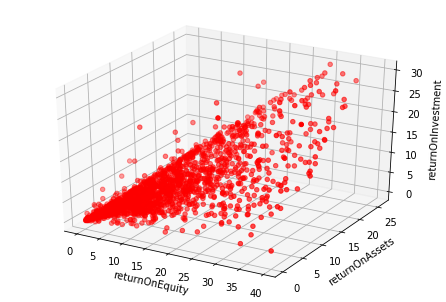

In [36]:
fig = plt.figure()
ax = Axes3D(fig)

x = list(indicators_df.iloc[:,0])
y = list(indicators_df.iloc[:,1])
z = list(indicators_df.iloc[:,2])

column_names = indicators_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# define the markers, and the color
ax.scatter(x, y, z, c='red', marker='o')

plt.show()

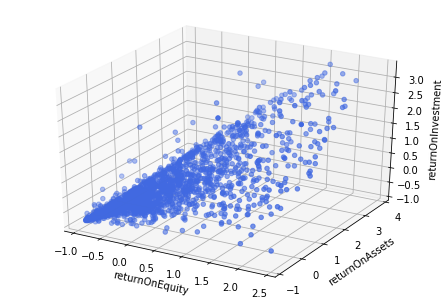

In [39]:
# min_max_scaler = MinMaxScaler()
# std_scaler = StandardScaler()
robust_scaler = RobustScaler()

# scale the data
# X_train_minmax = min_max_scaler.fit_transform(indicators_df)
# X_train_standard = std_scaler.fit_transform(indicators_df)
X_train_robust = robust_scaler.fit_transform(indicators_df)

# create a new plot
fig = plt.figure()
ax = Axes3D(fig)

# take the scaled data in this example.
x = X_train_robust[:,0]
y = X_train_robust[:,1]
z = X_train_robust[:,2]

# define the axes labels
column_names = indicators_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# create a new plot
ax.scatter(x, y, z, c='royalBlue')

plt.show()

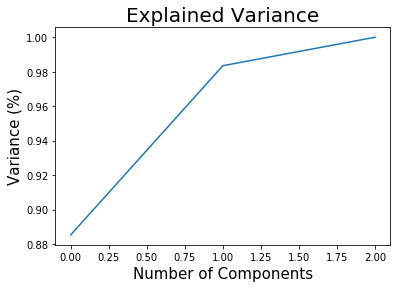

In [41]:
# pass through the scaled data set into our PCA class object
pca = PCA().fit(X_train_robust)

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()

It means we can explain using just two components

In [42]:
# create a PCA modified dataset
pca_dataset = PCA(n_components=2).fit(X_train_robust).transform(X_train_robust)

# store it in a new data frame
pca_dataset= pd.DataFrame(data = pca_dataset, columns = ['principal component 1', 'principal component 2'])

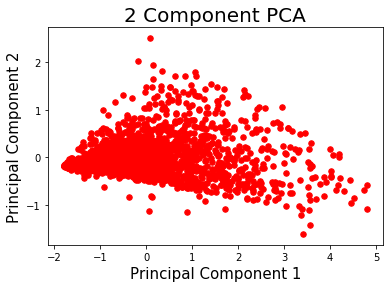

In [45]:
# define a figure
plt.figure()

# define the label and title
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 Component PCA', fontsize = 20)

# plot the figure
plt.scatter(pca_dataset['principal component 1'], pca_dataset['principal component 2'], c='red', s = 30)

## Model

In [46]:
from sklearn.cluster import KMeans
from sklearn import metrics

# define a dictionary that contains all of our relevant info.
results_dict = {}

# define how many clusters we want to test up to.
num_of_clusters = 10

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # define the next dictionary to hold all the results of this run.
    results_dict[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train_robust)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(X_train_robust, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['score'] = kmeans.score
    results_dict[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)


----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.5409025131522358
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.4715762202588651
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.40576519772835445
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score: 0.4176064168154567
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score: 0.39545762092592035
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score: 0.3683335833104357
--------------------------------------

In [47]:
# define a dictionary that contains all of our relevant info.
results_dict_pca = {}

# define how many clusters we want to test up to.
num_of_clusters = 10

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # define the next dictionary to hold all the results of this run.
    results_dict_pca[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_dataset)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(pca_dataset, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict_pca[k]['silhouette_score'] = sil_score
    results_dict_pca[k]['inertia'] = kmeans.inertia_
    results_dict_pca[k]['score'] = kmeans.score
    results_dict_pca[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.5491540143144819
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.4844668530469672
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.42238206450605215
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score: 0.43465107900612765
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score: 0.41597519474715533
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score: 0.38528525635039584
------------------------------------

### Model Evaluation

----------------------------------------------------------------------------------------------------


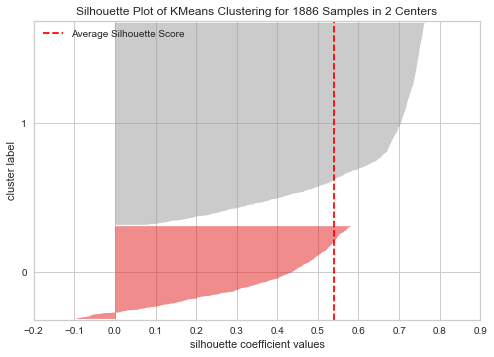

----------------------------------------------------------------------------------------------------


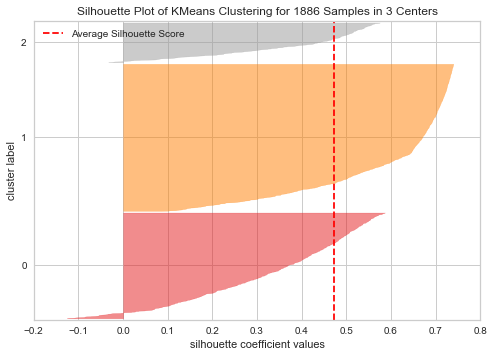

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(X_train_robust)

    # show the chart
    visualizer.poof()

----------------------------------------------------------------------------------------------------


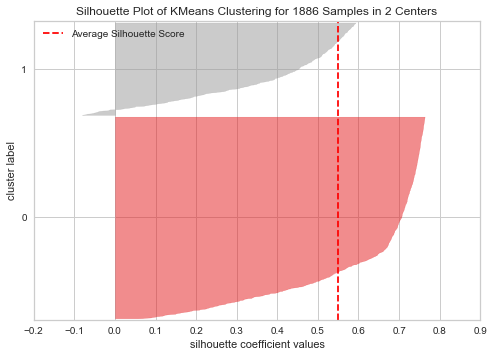

----------------------------------------------------------------------------------------------------


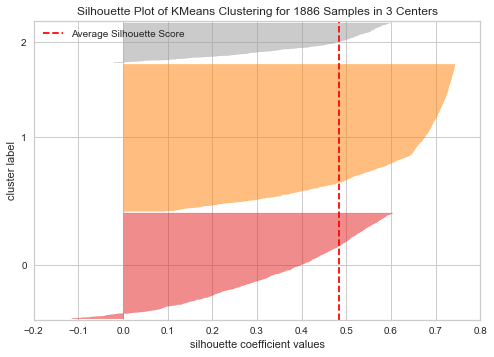

In [52]:
clusters = [2,3]

for cluster in clusters:

    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(pca_dataset)

    # show the chart
    visualizer.poof()

----------------------------------------------------------------------------------------------------


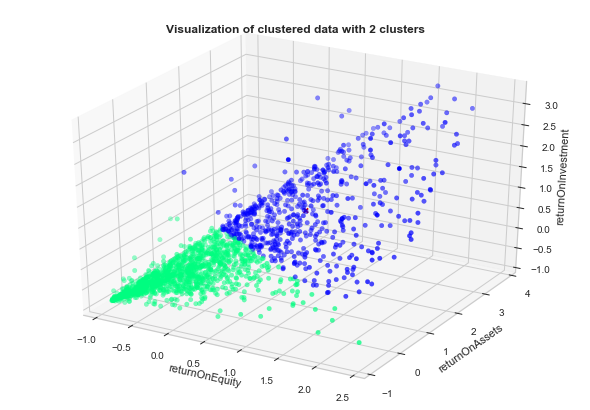

----------------------------------------------------------------------------------------------------


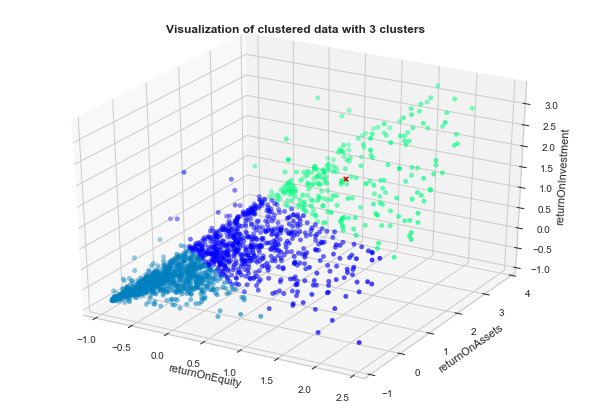

In [53]:
clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(X_train_robust)
    
    # define the cluster centers
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]
    C3 = cluster_centers[:, 2]


    # create a new plot
    fig = plt.figure()
    ax = Axes3D(fig)

    # take the scaled data in this example.
    x = X_train_robust[:,0]
    y = X_train_robust[:,1]
    z = X_train_robust[:,2]

    # define the axes labels
    column_names = indicators_df.columns
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[1])
    ax.set_zlabel(column_names[2])

    # create a new plot
    ax.scatter(x, y, z, c = kmeans.labels_.astype(float), cmap='winter')
    ax.scatter(C1, C2, C3, marker="x", color='r')

    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')

    plt.show()

----------------------------------------------------------------------------------------------------


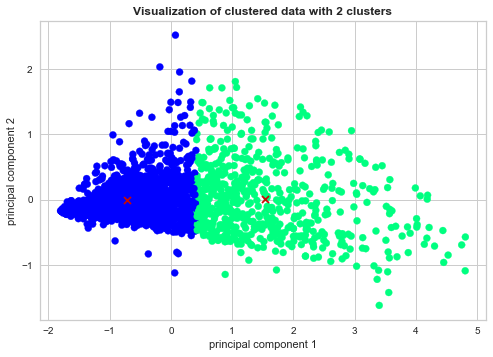

----------------------------------------------------------------------------------------------------


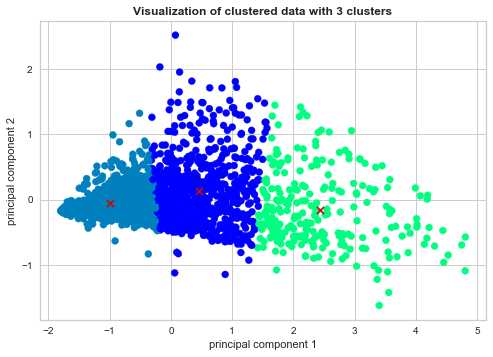

In [54]:
clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(pca_dataset)
    
    # define the cluster centers
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]

    # create a new plot
    plt.figure()

    # take the scaled data in this example.
    x = pca_dataset['principal component 1']
    y = pca_dataset['principal component 2']


    # define the axes labels
    column_names = pca_dataset.columns
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])

    # Visualize it:
    plt.scatter(x, y, c=kmeans.labels_.astype(float), cmap='winter')
    plt.scatter(C1, C2, marker="x", color='r')

    # Plot the clustered data
    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')
    plt.show()

In [55]:
# grab the model
kmeans = results_dict[3]['model']

# define some test data
test_data = [[0.10, 3.10, 5.20],
             [0.60, 5.10, 2.20]]

# make some predictions, in this case let's pass through our test set.
kmeans.predict(test_data)

array([2, 2], dtype=int32)